In [2]:
# import the necessary modules
import numpy as np
import pandas as pd

# import machine learning modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Intializing Lists to store the results
all_models = list()
accuracy_scores = list()
f1_scores=list()
recall_scores=list()
precision_scores=list()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load data
df = pd.read_csv(r"kddcup99_csv.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


#### Summarize the data

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Displays first 5 records in dataframe
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [8]:
#Displays last 5 records in dataframe
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal
494019,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal


In [9]:
#Give information about structural characterstics of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [10]:
#Displays Dimensions of Dataframe(No.of Rows,No.of Coloumns)
df.shape

(494020, 42)

In [11]:
#Finding missing data count in each coloumn
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
# Count the different types of attacks in the database
attack_counts = df['label'].value_counts()
print("Attack_Types:",df['label'].unique())
print("Total no.of attacks : ",attack_counts.count())
print(attack_counts)

Attack_Types: ['normal' 'buffer_overflow' 'loadmodule' 'perl' 'neptune' 'smurf'
 'guess_passwd' 'pod' 'teardrop' 'portsweep' 'ipsweep' 'land' 'ftp_write'
 'back' 'imap' 'satan' 'phf' 'nmap' 'multihop' 'warezmaster' 'warezclient'
 'spy' 'rootkit']
Total no.of attacks :  23
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64


In [13]:
#Checking datatypes for each coloumn in dataframe
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [14]:
# convert objects/categorical data into numerical data
lb_make = LabelEncoder()

Objt = [col for col in df.columns if df[col].dtype=="O"]
for item in Objt:
    df[item] = lb_make.fit_transform(df[item])
    

df.reset_index()
df.reset_index(drop=True)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,11
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,11
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,1,22,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,11
494016,0,1,22,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,11
494017,0,1,22,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,11
494018,0,1,22,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,11


#### Plot a correlation of features

<AxesSubplot:title={'center':'Correlation of Features'}>

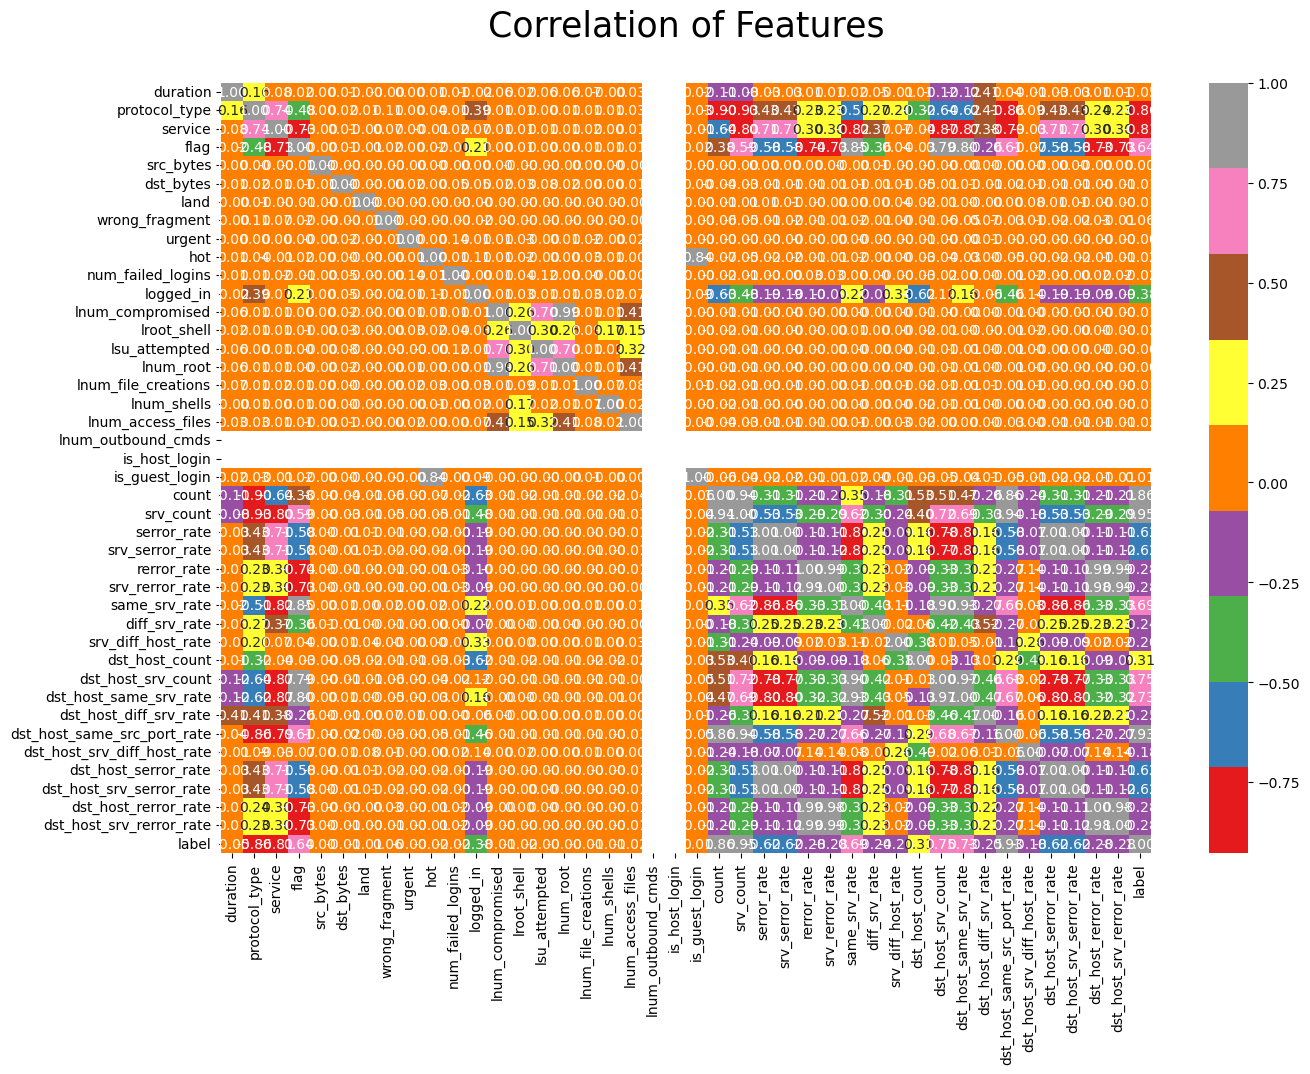

In [15]:
plt.figure(figsize = (15,10))
plt.title('Correlation of Features', y=1.05, size=25)
sns.heatmap(df.corr(), cmap='Set1',annot=True, fmt='.2f')

#### Data split

In [16]:
# Prepare X and y with features and ground truth
X = df.drop(columns=["label"])
y = df["label"]

In [17]:
# now split the data into training data and test data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#### Build the model

In [18]:
# define parameter
par = {'criterion' : ['gini'], 'max_depth' : [2], 'min_samples_leaf':[1]}

In [19]:
# Implement GridSearchCv
clf = GridSearchCV(DecisionTreeClassifier(), par, cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2],
                         'min_samples_leaf': [1]})

In [20]:
#### Get the prediction
y_pred = clf.predict(X_test)

In [21]:
# get confusion matrix
print(confusion_matrix(y_test,y_pred))

[[    0     0     0     0     0     0     0     0     0   413     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     1     0     3     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0    12     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     2     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0   249     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     2     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     3     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 21233     0   192     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0    43     0     0
      0     0     0   

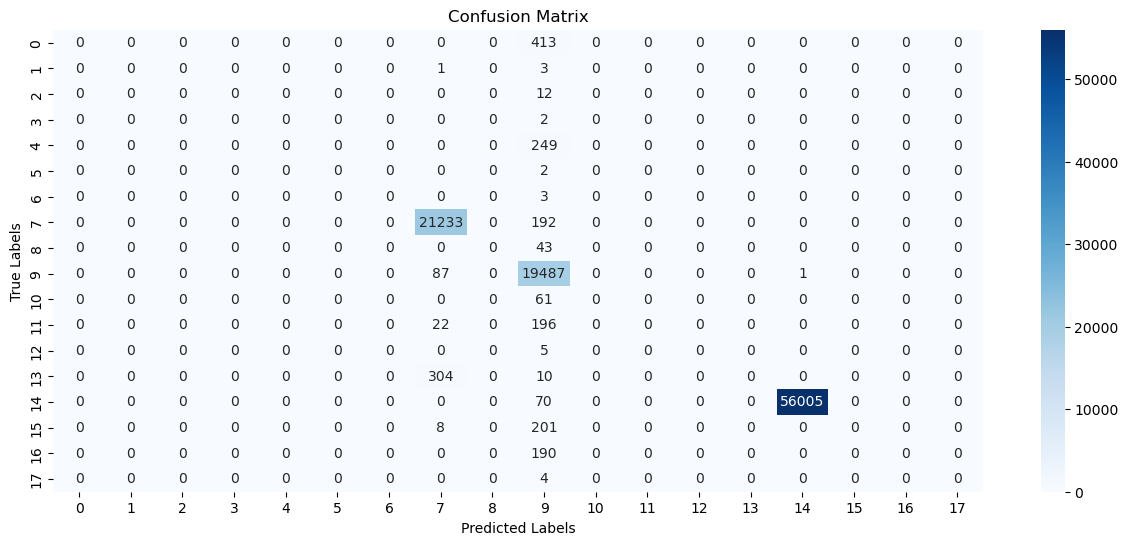

In [22]:
cm = confusion_matrix(y_test, y_pred)

# Calculate the confusion matrix and visualize it using heatmap
fig, ax = plt.subplots(figsize=(15, 6))

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [23]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       413
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       249
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           9       0.98      0.99      0.99     21425
          10       0.00      0.00      0.00        43
          11       0.92      1.00      0.96     19575
          14       0.00      0.00      0.00        61
          15       0.00      0.00      0.00       218
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00       314
          18       1.00      1.00      1.00     56075
          20       0.00      0.00      0.00       209
          21       0.00      0.00      0.00       190
          22       0.00    

In [24]:
# classification report
print("Accuracy of the Decision Tree Model is: ", accuracy_score(y_test,y_pred) * 100,"%")
acc1=accuracy_score(y_test,y_pred)
all_models.append("Decision Tree")
accuracy_scores.append(acc1*100)

Accuracy of the Decision Tree Model is:  97.89583417675398 %


In [25]:
# f1 score
f11=f1_score(y_test, y_pred, average='macro')
print("F1 score of Decision Tree Model is",f11)
f1_scores.append(f11)

F1 score of Decision Tree Model is 0.16346015532561234


In [26]:
# recall score
recall_1=recall_score(y_test, y_pred, average='macro')
print("Recall score of Decision Tree Model is",recall_1)
recall_scores.append(recall_1)

Recall score of Decision Tree Model is 0.16584970268183327


In [27]:
# precision score
preci_1=precision_score(y_test, y_pred, average='macro')
print("Precision of Decision Tree Model is",preci_1)
precision_scores.append(preci_1)

Precision of Decision Tree Model is 0.1612317185199792


### RANDOM FOREST

Train accuracy = 100.00%
------------------------------------------
Accuracy = 99.98%


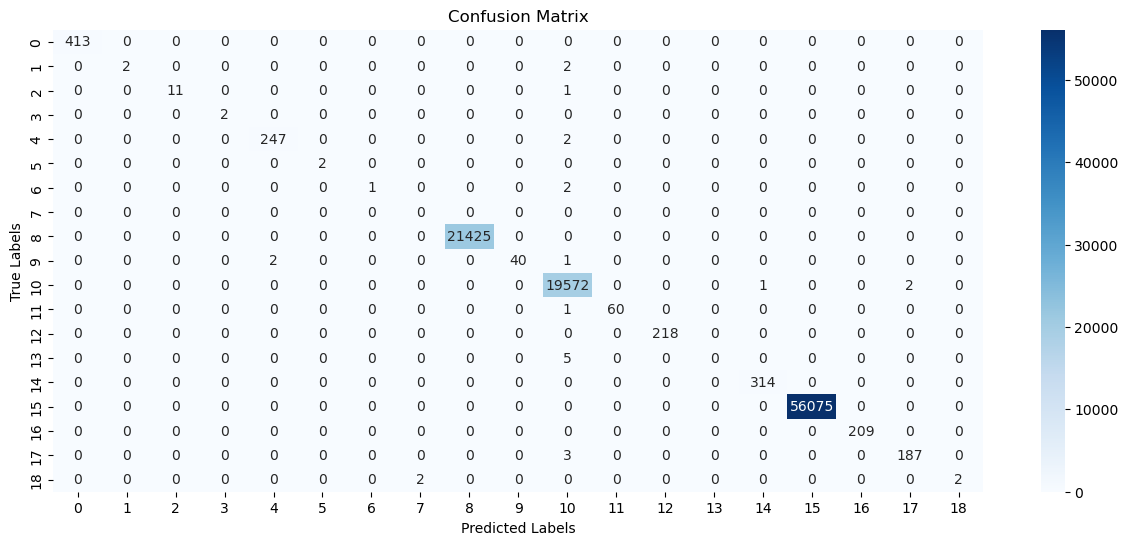

In [28]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
clf2.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing set
y_pred = clf2.predict(X_test)

#train accuracy
train_acc = clf2.score(X_train, y_train)
print("Train accuracy = {:.2f}%".format(train_acc*100))
all_models.append("Random Forest Model")

# Compute and print the accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy*100)
print("------------------------------------------")
print("Accuracy = {:.2f}%".format(accuracy * 100))



#Calculate the confusion matrix and visualize it using heatmap
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15, 6))

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [29]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      0.50      0.67         4
           3       1.00      0.92      0.96        12
           4       1.00      1.00      1.00         2
           5       0.99      0.99      0.99       249
           6       1.00      1.00      1.00         2
           7       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00     21425
          10       1.00      0.93      0.96        43
          11       1.00      1.00      1.00     19575
          14       1.00      0.98      0.99        61
          15       1.00      1.00      1.00       218
          16       0.00      0.00      0.00         5
          17       1.00      1.00      1.00       314
          18       1.00      1.00      1.00     56075
          20       1.00      1.00      1.00       209
          21       0.99    

In [30]:
#Accuracy for Random Forest
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for Random Forest Model is = {:.2f}%".format(accuracy * 100))


Accuracy for Random Forest Model is = 99.98%


In [31]:
# f1 score
f1_RF=f1_score(y_test, y_pred, average='macro')
print("F1 score for Random Forest Model is", f1_RF)
f1_scores.append(f1_RF)

F1 score for Random Forest Model is 0.827480041710684


In [32]:
# recall score
recall_RF=recall_score(y_test, y_pred, average='macro')
print("Recall score for Random Forest Model is ",recall_RF)
recall_scores.append(recall_RF)

Recall score for Random Forest Model is  0.7968349608743861


In [33]:
# precision score
preci_RF=precision_score(y_test, y_pred, average='macro')
print("Precision for Random Forest Model is",preci_RF)
precision_scores.append(preci_RF)

Precision for Random Forest Model is 0.8935443907232037


In [ ]:
DFrame = pd.DataFrame({"Model": all_models, "Accuracy": accuracy_scores,"Recall":recall_scores,"Precision":precision_scores,"F1 Score":f1_scores})
DFrame = DFrame.set_index("Model")
DFrame

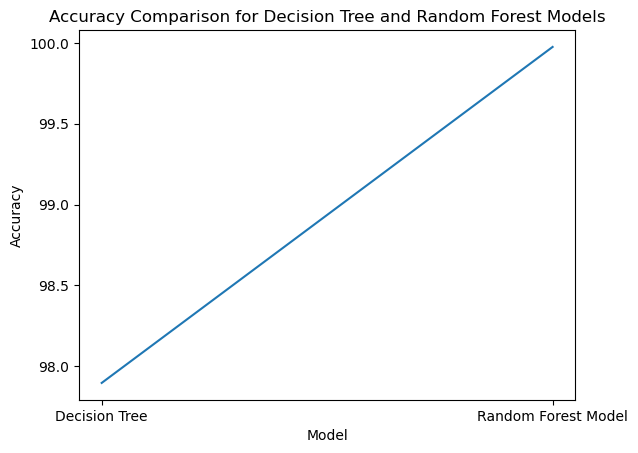

In [35]:
import matplotlib.pyplot as plt
plt.plot(all_models, accuracy_scores)

# Set the axis labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Decision Tree and Random Forest Models')

# Show the chart
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# create a K-Nearest Neighbors classifier object and fit it to the training data
knn = KNeighborsClassifier()
#knn = KNeighborsClassifier(n_neighbors=100, weights='distance', algorithm='auto', leaf_size=5, p=5, metric='minkowski')

knn.fit(X_train, y_train)

# use the trained classifier to predict the labels of the test data
y_pred = knn.predict(X_test)

#train accuracy
train_acc = knn.score(X_train, y_train)
print("Train accuracy = {:.2f}%".format(train_acc*100))

# compute the accuracy of the predictions
acc = accuracy_score(y_test, y_pred)

# print the accuracy
print("Accuracy: {:.2f}%".format(acc * 100))


In [ ]:
#Calculate the confusion matrix and visualize it using heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
print(report)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for knn Model is = {:.2f}%".format(accuracy * 100))